In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
future50 = pd.read_csv('./Future50.csv')
independence100 = pd.read_csv('./Independence100.csv')
top250 = pd.read_csv('./Top250.csv')

future50.head(5)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


### Tratando dados Future 50

In [19]:
future50 = future50.set_index(future50['Rank'])
future50 = future50.drop(columns = ['Rank'])

In [25]:
future50['City'] = future50['Location'].apply(lambda x: x.split(',')[0])

In [27]:
future50.head(5)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,City
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,Seattle
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,Charlotte
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,Huntington Beach
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,Wilmington
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,Irvine


## TAREFA 1: Plotando Venda por Cidade

In [88]:
sales_percity = future50.groupby('City').sum(numeric_only = True)

cities = [city for city, df in future50.groupby('City')]

#### Essa lista atribuída à cities "[city for city, df in future50.groupby('City')]" faz com que apareça um count unique das cidades na mesma ordem do groupby. Usar funções como .unique() pode causar inconsistência na hora de plotar o gráfico porque ele muda a ordem das cidades.

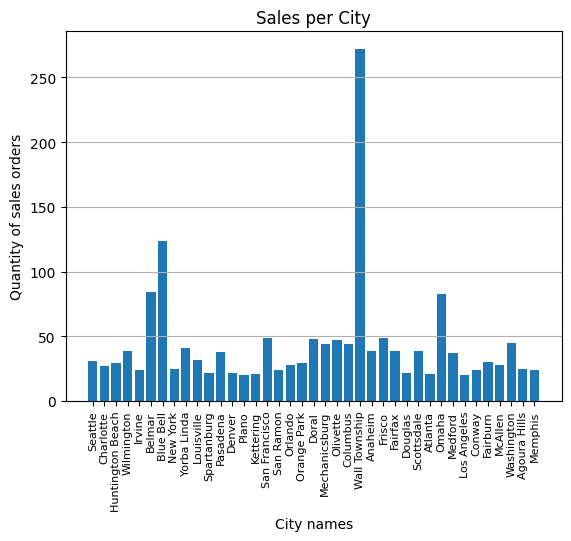

In [224]:
plt.bar(cities, sales_percity['Sales'])
plt.title('Sales per City')
plt.xlabel('City names')
plt.ylabel('Quantity of sales orders')
plt.xticks(rotation = 'vertical', size = 8)
plt.grid(axis='y')
plt.show()

## TAREFA 2: Plotar venda por cidade usando sort_values( )

In [79]:
sales_percity.sort_values('Sales',ascending=False,inplace=True)

sales_percity.head(5)

,Rank,Sales,Units,Unit_Volume
City,,,,
New York,189,272,229,15100
Columbus,99,124,96,5135
Charlotte,39,84,132,2100
San Francisco,65,83,87,3330
Irvine,5,49,50,1210


In [73]:
cities = sales_percity.index.unique()

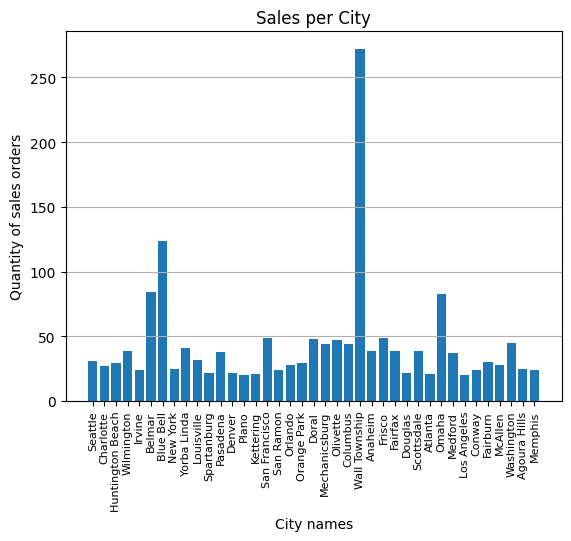

In [225]:
plt.bar(cities, sales_percity['Sales'])
plt.title('Sales per City')
plt.xlabel('City names')
plt.ylabel('Quantity of sales orders')
plt.xticks(rotation = 'vertical', size = 8)
plt.grid(axis='y')
plt.show()

## TAREFA 3: Quais cidades possuem a maior proporção de lojas franqueadas?

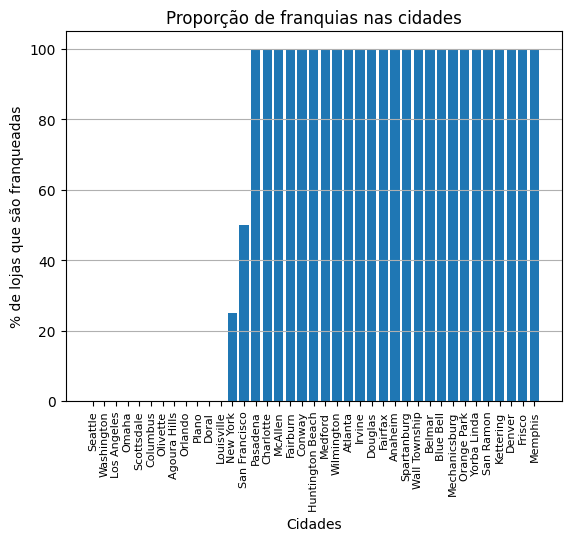

In [228]:
df_franchising_ratio = pd.DataFrame()
df_franchising_ratio['City'] = future50['City'].unique()
df_franchising_ratio['Ratio'] = 0

def get_ratio(city):
    quantity_franchising = len(future50.loc[(future50['Franchising'] == 'Yes') & (future50['City'] == city)])
    total_quantity = len(future50.loc[(future50['City'] == city)])
    ratio = round((quantity_franchising / total_quantity)*100,2)
    return ratio
    
df_franchising_ratio['Ratio'] = df_franchising_ratio['City'].apply(lambda x: get_ratio(x))
df_franchising_ratio = df_franchising_ratio.sort_values('Ratio', ascending = True)

plt.bar(df_franchising_ratio['City'],df_franchising_ratio['Ratio'])
plt.xticks(rotation = 'vertical', size = 8)
plt.ylabel('% de lojas que são franqueadas')
plt.xlabel('Cidades')
plt.grid(axis='y')
plt.title('Proporção de franquias nas cidades')
plt.show()